# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O options_bear_put_ladder.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_bear_put_ladder/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' options_bear_put_ladder.py

--2024-01-14 12:37:13--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_bear_put_ladder/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5503 (5.4K) [text/plain]
Saving to: ‘options_bear_put_ladder.py’

options_bear_put_la 100%[===================>]   5.37K  --.-KB/s    in 0s      

2024-01-14 12:37:13 (86.7 MB/s) - ‘options_bear_put_ladder.py’ saved [5503/5503]



In [6]:
from options_bear_put_ladder import OptionsBearPutLadder as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 139794,
 'strategyId': 'dd3f9ff23fcd40499a121e96bf31b772'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('NIFTY BANK', exchange='NSE')
instrument

[{'id': 5669, 'value': 'NSE:NIFTY BANK'}]

## Setup Parameters

In [10]:
parameters = {
    'LEG_ONE_NUMBER_OF_STRIKES': 0,
    'LEG_ONE_STRIKE_DIRECTION': 1,
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_ONE_TRANSACTION_TYPE': 1,
    
    'LEG_THREE_NUMBER_OF_STRIKES': 2,
    'LEG_THREE_STRIKE_DIRECTION': 0,
    'LEG_THREE_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_THREE_TRANSACTION_TYPE': 2,
    
    'LEG_TWO_NUMBER_OF_STRIKES': 2,
    'LEG_TWO_STRIKE_DIRECTION': 2,
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_TWO_TRANSACTION_TYPE': 1
}

In [11]:
initial_virtual_funds = 1450000     # in Rupees

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2022-02-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:NIFTY BANK', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Bear Put Ladder' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Options Bear Put Ladder                │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY BANK']                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 10                                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2022-02-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 202

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/47110500.0 [00:00<?]

In [15]:
print(logs)

[2024-01-14 12:38:19] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-01-14 12:38:19] Sanity checks on cfg successful.
[2024-01-14 12:38:19] Currency set to "INR"
[2024-01-14 12:38:20] Setting up broker connection...
[2024-01-14 12:38:22] Broker connection has been setup successfully.
[2024-01-14 12:38:22] (NSE_IDX) Funds available in client's ABVIRTUALBROKER account is : INR '1450000.00'
[2024-01-14 12:38:22] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-01-14 12:38:22] Welcome ALGOBULLS VIRTUAL USER!
[2024-01-14 12:38:22] Reading strategy...
[2024-01-14 12:38:22] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2022-02-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2022-02-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #  

### Stop

In [21]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                   NFO  BANKNIFTY03FEB2238700PE 2022-02-01 09:15:00+05:30   
1                   NFO  BANKNIFTY03FEB2238700PE 2022-02-01 09:15:00+05:30   
2                   NFO  BANKNIFTY03FEB2238500PE 2022-02-01 09:15:00+05:30   
3                   NFO  BANKNIFTY03FEB2239000PE 2022-02-02 09:15:00+05:30   
4                   NFO  BANKNIFTY03FEB2239000PE 2022-02-02 09:15:00+05:30   
5                   NFO  BANKNIFTY03FEB2238800PE 2022-02-02 09:15:00+05:30   
6                   NFO  BANKNIFTY03FEB2239500PE 2022-02-03 09:15:00+05:30   
7                   NFO  BANKNIFTY03FEB2239500PE 2022-02-03 09:15:00+05:30   
8                   NFO  BANKNIFTY03FEB2239300PE 2022-02-03 09:15:00+05:30   
9                   NFO  BANKNIFTY10FEB2239300PE 2022-02-04 09:15:00+05:30   
10                  NFO  BANKNIFTY10FEB2239300PE 2022-02-04 09:15:00+05:30   
11                  NFO  BANKNIFTY10FEB2239100PE 2022-02-04 09:15:00+05:30   
12                  NFO  BANKNIFTY10FEB2238800PE 2022-02-07 09:15:00+05:30   
13                  NFO  BANKNIFTY10FEB2238800PE 2022-02-07 09:15:00+05:30   
14                  NFO  BANKNIFTY10FEB2238600PE 2022-02-07 09:15:00+05:30   
15                  NFO  BANKNIFTY10FEB2238400PE 2022-02-08 09:15:00+05:30   
16                  NFO  BANKNIFTY10FEB2238400PE 2022-02-08 09:15:00+05:30   
17                  NFO  BANKNIFTY10FEB2238200PE 2022-02-08 09:15:00+05:30   
18                  NFO  BANKNIFTY10FEB2238500PE 2022-02-09 09:15:00+05:30   
19                  NFO  BANKNIFTY10FEB2238500PE 2022-02-09 09:15:00+05:30   
20                  NFO  BANKNIFTY10FEB2238300PE 2022-02-09 09:15:00+05:30   
21                  NFO  BANKNIFTY10FEB2239000PE 2022-02-10 09:15:00+05:30   
22                  NFO  BANKNIFTY10FEB2239000PE 2022-02-10 09:15:00+05:30   
23                  NFO  BANKNIFTY10FEB2238800PE 2022-02-10 09:15:00+05:30   
24                  NFO  BANKNIFTY17FEB2238800PE 2022-02-11 09:15:00+05:30   
25                  NFO  BANKNIFTY17FEB2238800PE 2022-02-11 09:15:00+05:30   
26                  NFO  BANKNIFTY17FEB2238600PE 2022-02-11 09:15:00+05:30   
27                  NFO  BANKNIFTY17FEB2237900PE 2022-02-14 09:15:00+05:30   
28                  NFO  BANKNIFTY17FEB2237900PE 2022-02-14 09:15:00+05:30   
29                  NFO  BANKNIFTY17FEB2237700PE 2022-02-14 09:15:00+05:30   
30                  NFO  BANKNIFTY17FEB2237200PE 2022-02-15 09:15:00+05:30   
31                  NFO  BANKNIFTY17FEB2237200PE 2022-02-15 09:15:00+05:30   
32                  NFO  BANKNIFTY17FEB2237000PE 2022-02-15 09:15:00+05:30   
33                  NFO  BANKNIFTY17FEB2238500PE 2022-02-16 09:15:00+05:30   
34                  NFO  BANKNIFTY17FEB2238500PE 2022-02-16 09:15:00+05:30   
35                  NFO  BANKNIFTY17FEB2238300PE 2022-02-16 09:15:00+05:30   
36                  NFO  BANKNIFTY17FEB2238200PE 2022-02-17 09:15:00+05:30   
37                  NFO  BANKNIFTY17FEB2238200PE 2022-02-17 09:15:00+05:30   
38                  NFO  BANKNIFTY17FEB2238000PE 2022-02-17 09:15:00+05:30   
39                  NFO  BANKNIFTY24FEB2237500PE 2022-02-18 09:15:00+05:30   
40                  NFO  BANKNIFTY24FEB2237500PE 2022-02-18 09:15:00+05:30   
41                  NFO  BANKNIFTY24FEB2237300PE 2022-02-18 09:15:00+05:30   
42                  NFO  BANKNIFTY24FEB2237600PE 2022-02-21 09:15:00+05:30   
43                  NFO  BANKNIFTY24FEB2237600PE 2022-02-21 09:15:00+05:30   
44                  NFO  BANKNIFTY24FEB2237400PE 2022-02-21 09:15:00+05:30   
45                  NFO  BANKNIFTY24FEB2237000PE 2022-02-22 09:15:00+05:30   
46                  NFO  BANKNIFTY24FEB2237000PE 2022-02-22 09:15:00+05:30   
47                  NFO  BANKNIFTY24FEB2236800PE 2022-02-22 09:15:00+05:30   
48                  NFO  BANKNIFTY24FEB2237800PE 2022-02-23 09:15:00+05:30   
49                  NFO  BANKNIFTY24FEB2237800PE 2022-02-23 09:15:00+05:30   
50                  NFO  BA

### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-02-01
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -73.61%
CAGR﹪              -59.03%

Sharpe              0.55
Prob. Sharpe Ratio  75.38%
Sortino             0.99
Sortino/√2          0.7
Omega               1.11

Max Drawdown        -88.3%
Longest DD Days     530

Gain/Pain Ratio     0.11
Gain/Pain (1M)      1.01

Payoff Ratio        1.48
Profit Factor       1.11
Common Sense Ratio  1.41
CPC Index           0.7
Tail Ratio          1.27
Outlier Win Ratio   4.75
Outlier Loss Ratio  3.23

MTD                 -3.59%
3M                  -19.86%
6M                  -42.98%
YTD                 13.04%
1Y                  -51.12%
3Y (ann.)           -59.03%
5Y (ann.)           -59.03%
10Y (ann.)          -59.03%
All-time (ann.)     -59.03%

Avg. Drawdown       -53.62%
Avg. Drawdown Days  272
Recovery Factor     -0.83
Ulcer Index         0.58
Serenity I

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-02-01
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -73.61%
CAGR﹪                     -59.03%

Sharpe                     0.55
Prob. Sharpe Ratio         75.38%
Smart Sharpe               0.4
Sortino                    0.99
Smart Sortino              0.72
Sortino/√2                 0.7
Smart Sortino/√2           0.51
Omega                      1.11

Max Drawdown               -88.3%
Longest DD Days            530
Volatility (ann.)          216.22%
Calmar                     -0.67
Skew                       1.94
Kurtosis                   9.6

Expected Daily %           -0.36%
Expected Monthly %         -7.13%
Expected Yearly %          -48.63%
Kelly Criterion            4.25%
Risk of Ruin               0.0%
Daily Value-at-Risk        -21.93%
Expected Shortfall (cVaR)  -21.93%

Max Consecutive Wins

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-02-16  2022-12-21  2023-07-31   530    -88.297769        -81.246283
2  2022-02-02  2022-02-14  2022-02-15    13    -18.934877        -12.907709

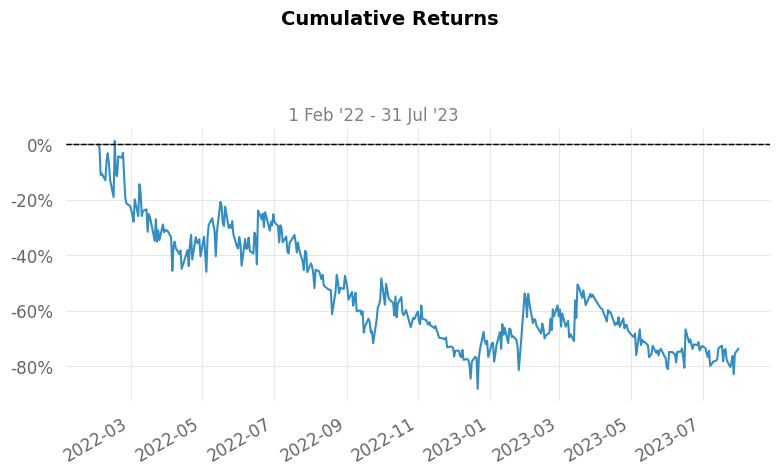

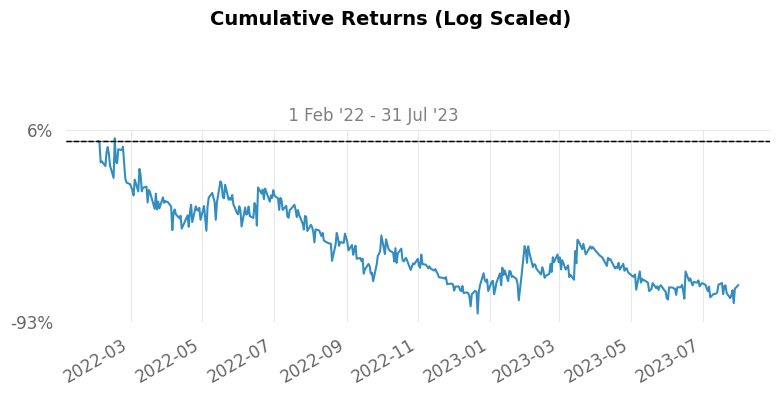

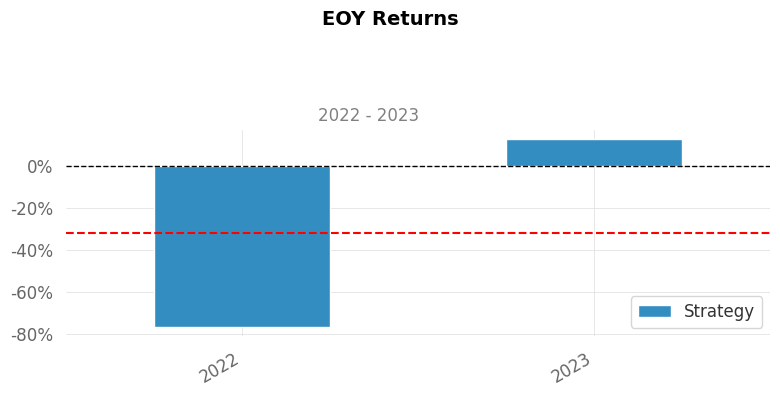

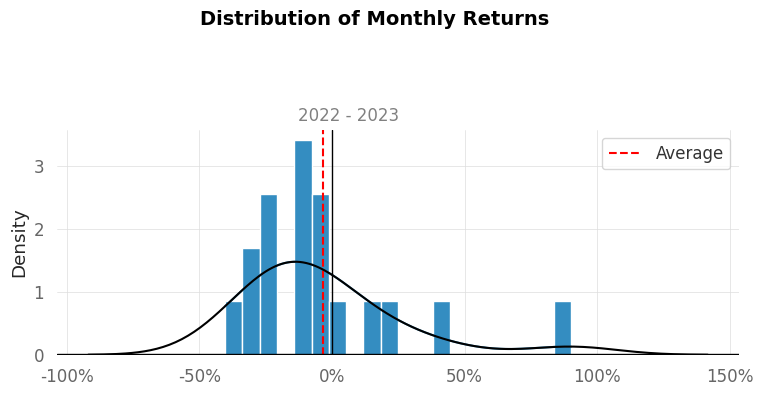

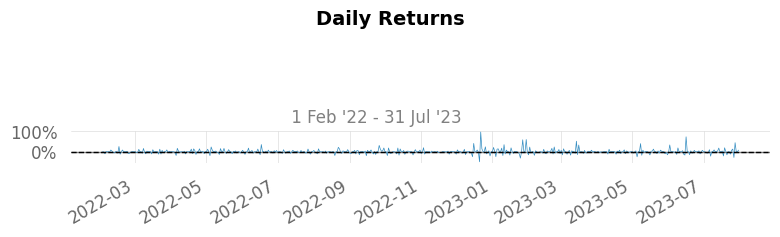

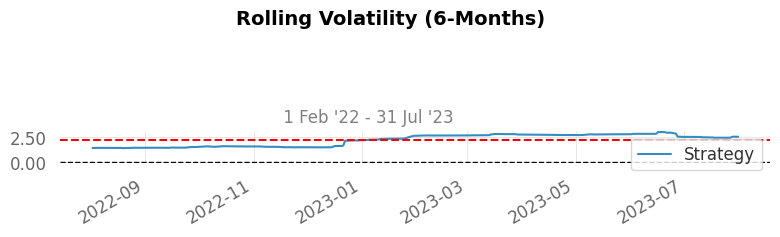

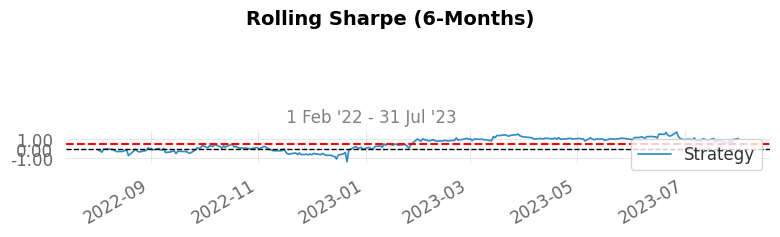

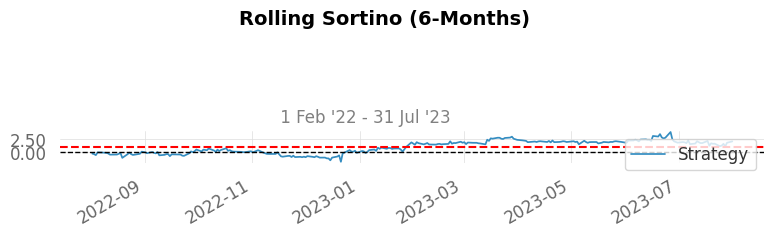

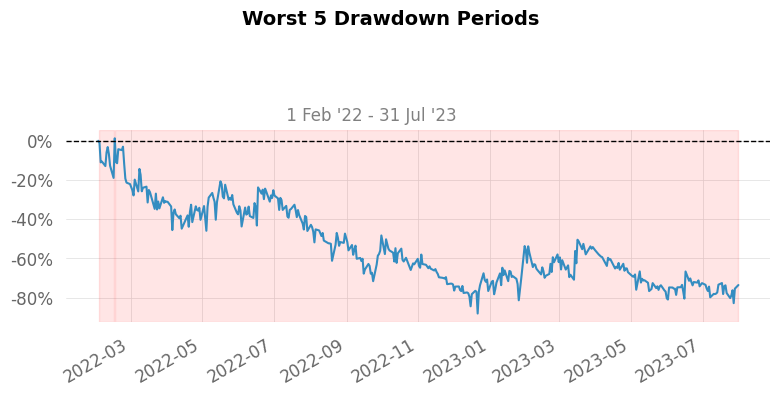

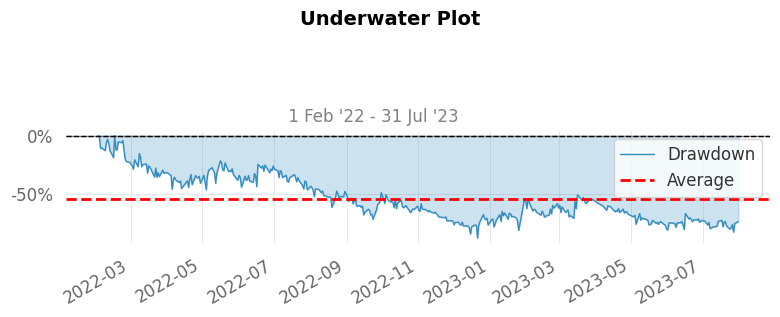

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


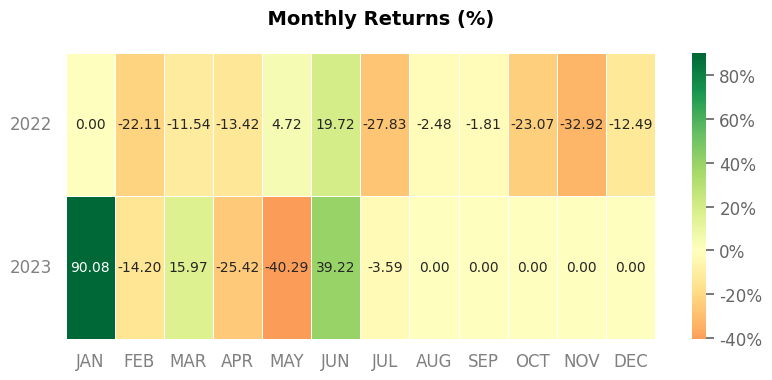

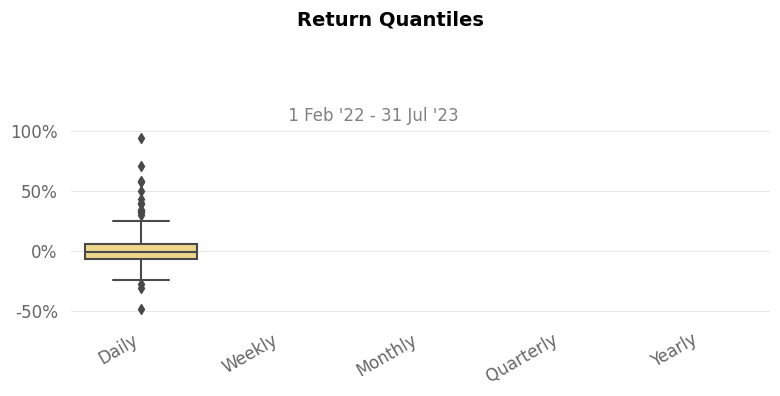

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 0285e0d628df400c9175be7d3879e6f8 |
| Transaction Type | BUY                              |
| Instrument       | NSE:BANKNIFTY03AUG2345700PE      |
| Quantity         | 150                              |
| Price            | ₹372.0                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-14T07:14:10.058736Z | COMPLETE               |
| 2024-01-14T07:14:10.058717Z | OPEN                   |
| 2024-01-14T07:14:10.058701Z | OPEN PENDING           |
| 2024-01-14T07:14:10.058681Z | VALIDATION PENDING     |
| 2024-01-14T07:14:10.058634Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 8b67788995ca45678

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)